# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БПИ-2303 Гавриленко Владислав
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

#### Алгоритм Флойда-Уоршелла

Кратчайший путь от A до D: ['A', 'F', 'D'] (длина: 5.0)


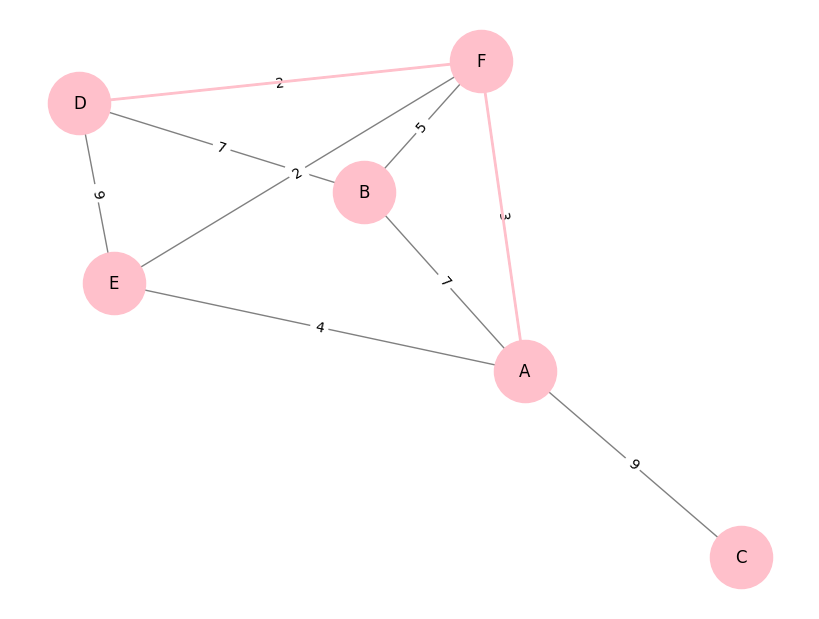


Анализ временной сложности:
   Узлы  Рёбра  Время (сек)
0     5     10     0.000071
1    10     20     0.000050
2    15     30     0.000062
3    20     40     0.000083
4    25     50     0.000127
5    30     60     0.000358
6    35     70     0.000162
7    40     80     0.000174
8    45     90     0.000211
9    50    100     0.000247


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import random

def generate_graph(nodes=5, edges=7, max_weight=10):
    graph = nx.Graph()
    all_nodes = [chr(65 + i) for i in range(nodes)]
    graph.add_nodes_from(all_nodes)
    
    for _ in range(edges):
        u, v = random.sample(all_nodes, 2)
        weight = random.randint(1, max_weight)
        graph.add_edge(u, v, weight=weight)
        graph.add_edge(v, u, weight=weight)
    return graph

def floyd_warshall(graph):
    return nx.floyd_warshall_numpy(graph, weight='weight')

def compute_shortest_path(graph, start, end):
    nodes = list(graph.nodes)
    if start not in nodes or end not in nodes:
        print("Ошибка: одна из вершин отсутствует в графе.")
        return None, None
    
    dist_matrix = floyd_warshall(graph)
    idx1, idx2 = nodes.index(start), nodes.index(end)
    distance = dist_matrix[idx1, idx2]
    path = nx.shortest_path(graph, source=start, target=end, weight='weight')
    return path, distance

def draw_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    
    nx.draw(graph, pos, with_labels=True, node_color='pink', edge_color='grey', node_size=2000, font_size=12)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='pink', width=2)
    plt.show()

def benchmark_algorithm():
    results = []
    for n in range(5, 51, 5):
        m = n * 2
        graph = generate_graph(n, m)
        start_time = time.time()
        floyd_warshall(graph)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((n, m, execution_time))
    df = pd.DataFrame(results, columns=["Узлы", "Рёбра", "Время (сек)"])
    print("\nАнализ временной сложности:")
    print(df)

graph = generate_graph(6, 10)
path, distance = compute_shortest_path(graph, 'A', 'D')
if path is not None:
    print(f"Кратчайший путь от A до D: {path} (длина: {distance})")
    draw_graph(graph, path)

benchmark_algorithm()

#### Алгоритм Дейкстры

Кратчайший путь от A до D: ['A', 'E', 'F', 'D'] (длина: 7)


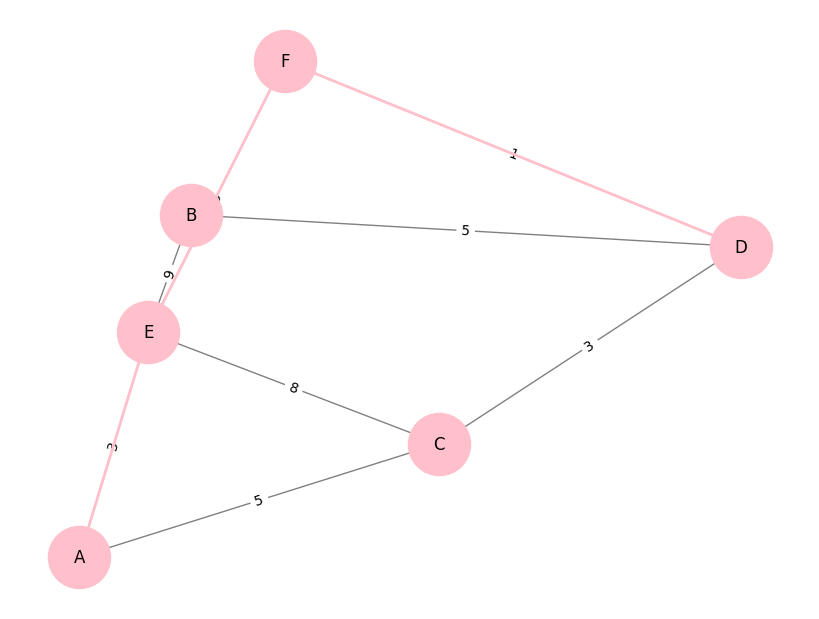


Анализ временной сложности:
   Узлы  Рёбра  Время (сек)
0     5     10     0.000017
1    10     20     0.000009
2    15     30     0.000030
3    20     40     0.000018
4    25     50     0.000051
5    30     60     0.000068
6    35     70     0.000030
7    40     80     0.000060
8    45     90     0.000105
9    50    100     0.000025


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import random

def generate_graph(nodes=5, edges=7, max_weight=10):
    graph = nx.Graph()
    all_nodes = [chr(65 + i) for i in range(nodes)]
    graph.add_nodes_from(all_nodes)
    
    for _ in range(edges):
        u, v = random.sample(all_nodes, 2)
        weight = random.randint(1, max_weight)
        graph.add_edge(u, v, weight=weight)
        graph.add_edge(v, u, weight=weight)
    return graph

def dijkstra(graph, start, end):
    nodes = list(graph.nodes)
    if start not in nodes or end not in nodes:
        print("Ошибка: одна из вершин отсутствует в графе.")
        return None, None
    
    distances = {node: float('inf') for node in graph}
    previous_nodes = {node: None for node in graph}
    distances[start] = 0
    unvisited_nodes = list(graph.nodes)
    
    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)
        
        if current_node == end:
            break
        
        for neighbor in graph[current_node]:
            tentative_distance = distances[current_node] + graph[current_node][neighbor]['weight']
            if tentative_distance < distances[neighbor]:
                distances[neighbor] = tentative_distance
                previous_nodes[neighbor] = current_node
    
    path = []
    current_node = end
    while current_node is not None:
        path.insert(0, current_node)
        current_node = previous_nodes[current_node]
    return path, distances[end]

def draw_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    
    nx.draw(graph, pos, with_labels=True, node_color='pink', edge_color='gray', node_size=2000, font_size=12)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='pink', width=2)
    plt.show()

def benchmark_algorithm():
    results = []
    for n in range(5, 51, 5):
        m = n * 2 
        graph = generate_graph(n, m)
        start_time = time.time()
        dijkstra(graph, 'A', chr(65 + n - 1))
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((n, m, execution_time))
    
    df = pd.DataFrame(results, columns=["Узлы", "Рёбра", "Время (сек)"])
    print("\nАнализ временной сложности:")
    print(df)

graph = generate_graph(6, 10)
path, distance = dijkstra(graph, 'A', 'D')
if path is not None:
    print(f"Кратчайший путь от A до D: {path} (длина: {distance})")
    draw_graph(graph, path)

benchmark_algorithm()

#### Алгоритм Беллмана-Форда

Кратчайший путь от A до D: ['A', 'C', 'B', 'D'] (длина: 2)


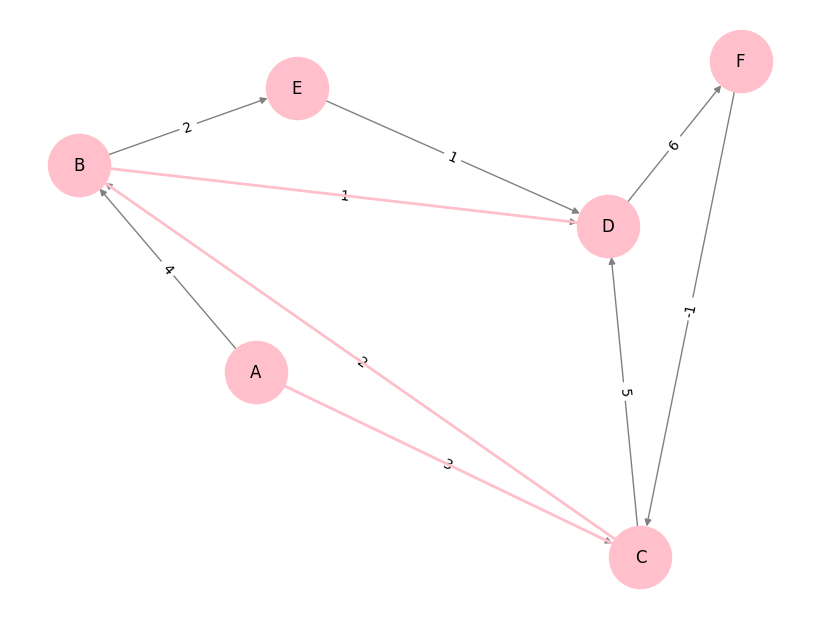


Анализ временной сложности:
   Узлы  Рёбра  Время (сек)
0     9     18     0.000030
1     6     10     0.000019
2    14     23     0.000016
3    11     20     0.000016
4    11     11     0.000017
5    11     17     0.000016
6     9     16     0.000019
7     9     12     0.000016
8    10     13     0.000016
9    12     18     0.000015


In [1]:
import time
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_graph():
    graph = nx.DiGraph() 
    nodes = ['A', 'B', 'C', 'D', 'E', 'F']
    graph.add_nodes_from(nodes)
    graph.add_edge('A', 'B', weight=4)
    graph.add_edge('A', 'C', weight=3)
    graph.add_edge('B', 'D', weight=1)
    graph.add_edge('C', 'D', weight=5)
    graph.add_edge('B', 'E', weight=2)
    graph.add_edge('E', 'D', weight=1)
    graph.add_edge('C', 'B', weight=-2) 
    graph.add_edge('D', 'F', weight=6)
    graph.add_edge('F', 'C', weight=-1)  
    return graph

def bellman_ford(graph, start, end):
    nodes = list(graph.nodes)
    if start not in nodes or end not in nodes:
        return None, None
    
    distances = {node: float('inf') for node in graph}
    previous_nodes = {node: None for node in graph}
    distances[start] = 0

    for _ in range(len(graph.nodes) - 1):
        for u, v, data in graph.edges(data=True):
            weight = data['weight']
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                previous_nodes[v] = u

    for u, v, data in graph.edges(data=True):
        weight = data['weight']
        if distances[u] + weight < distances[v]:
            return None, None
    
    path = []
    current_node = end
    while current_node is not None:
        path.insert(0, current_node)
        current_node = previous_nodes[current_node]
    return path, distances[end]

def draw_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    
    nx.draw(graph, pos, with_labels=True, node_color='pink', edge_color='gray', node_size=2000, font_size=12)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='pink', width=2)
    plt.show()

def benchmark_algorithm():
    results = []
    for _ in range(10):  
        nodes = random.randint(5, 15) 
        edges = random.randint(nodes, nodes * 2)
        graph = generate_graph()  
        start_time = time.time()
        bellman_ford(graph, 'A', 'D')  
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((nodes, edges, execution_time))
    df = pd.DataFrame(results, columns=["Узлы", "Рёбра", "Время (сек)"])
    print("\nАнализ временной сложности:")
    print(df)
graph = generate_graph()  
path, distance = bellman_ford(graph, 'A', 'D')
if path is not None:
    print(f"Кратчайший путь от A до D: {path} (длина: {distance})")
    draw_graph(graph, path)
benchmark_algorithm()

#### Алгоритм Джонсона

Кратчайший путь от A до D: ['A', 'B', 'F', 'D'] (дистанция: 7)


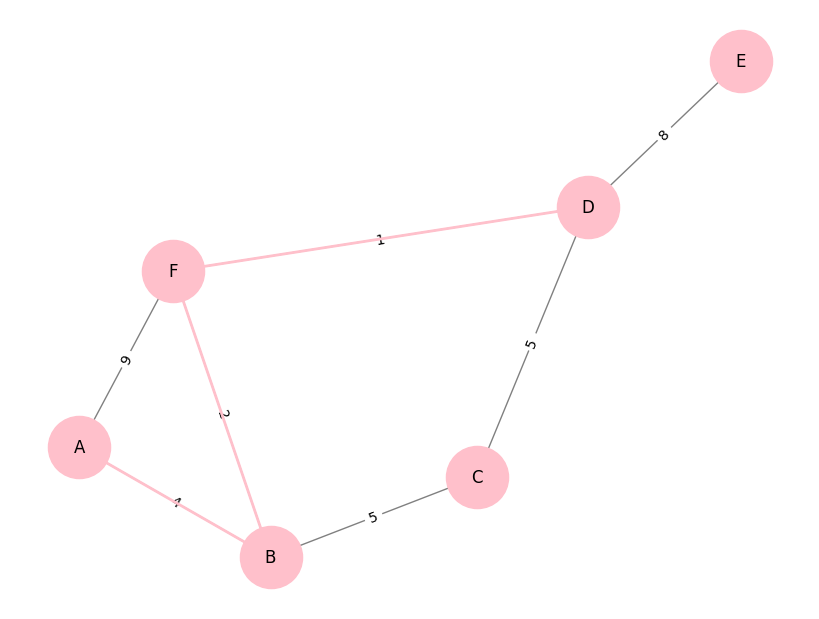


Анализ временной сложности:
   Узлы  Рёбра  Время (сек)
0     5     10     0.000065
1    10     20     0.000198
2    15     30     0.000363
3    20     40     0.000936
4    25     50     0.001268
5    30     60     0.001748
6    35     70     0.002497
7    40     80     0.002944
8    45     90     0.005324
9    50    100     0.004845


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import random

def generate_graph(nodes=5, edges=7, max_weight=10):
    graph = nx.Graph()
    all_nodes = [chr(65 + i) for i in range(nodes)]
    graph.add_nodes_from(all_nodes)
    
    for _ in range(edges):
        u, v = random.sample(all_nodes, 2)
        weight = random.randint(1, max_weight)
        graph.add_edge(u, v, weight=weight)
        graph.add_edge(v, u, weight=weight)
    return graph

def johnson(graph):
    try:
        shortest_paths = dict(nx.all_pairs_dijkstra_path(graph))
        shortest_distances = dict(nx.all_pairs_dijkstra_path_length(graph))
        return shortest_paths, shortest_distances
    except nx.NetworkXUnbounded:
        print("Граф содержит отрицательные циклы.")
        return None, None

def draw_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='pink', edge_color='gray', node_size=2000, font_size=12)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='pink', width=2)
    plt.show()

def benchmark_algorithm():
    results = []
    for n in range(5, 51, 5):
        m = n * 2
        graph = generate_graph(n, m)
        start_time = time.time()
        johnson(graph)
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((n, m, execution_time))
    
    df = pd.DataFrame(results, columns=["Узлы", "Рёбра", "Время (сек)"])
    print("\nАнализ временной сложности:")
    print(df)

graph = generate_graph(6, 10)
shortest_paths, shortest_distances = johnson(graph)

if shortest_paths is not None:
    if 'A' in shortest_paths and 'D' in shortest_paths['A']:
        path_A_to_D = shortest_paths['A']['D']
        print(f"Кратчайший путь от A до D: {path_A_to_D} (дистанция: {shortest_distances['A']['D']})")
        draw_graph(graph, path_A_to_D)
    else:
        print("Нет пути от A до D.")

benchmark_algorithm()

#### Алгоритм Левита

Кратчайший путь от A до C: ['A', 'B', 'C'] {-16}


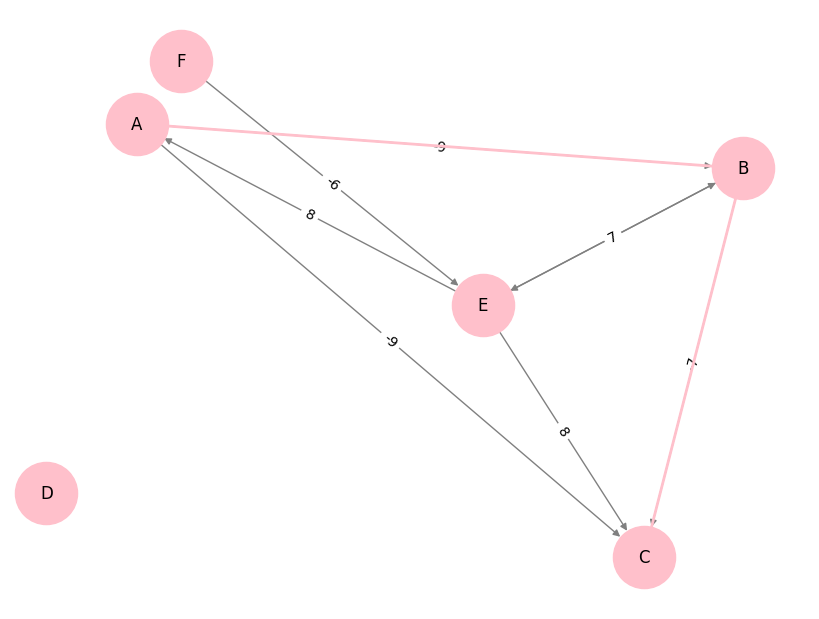


Анализ временной сложности:
   Узлы  Рёбра  Время (сек)
0     5     10     0.000021
1    10     20     0.000009
2    15     30     0.000033
3    20     40     0.000053
4    25     50     0.000066
5    30     60     0.000010
6    35     70     0.000086
7    40     80     0.000103
8    45     90     0.000145
9    50    100     0.000010


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import random
import heapq

def generate_graph(nodes=5, edges=7, max_weight=10):
    graph = nx.DiGraph()
    all_nodes = [chr(65 + i) for i in range(nodes)]
    graph.add_nodes_from(all_nodes)
    
    for _ in range(edges):
        u, v = random.sample(all_nodes, 2)
        weight = random.randint(-max_weight, max_weight)
        graph.add_edge(u, v, weight=weight)
    return graph

def levit(graph, start):
    distances = {node: float('inf') for node in graph}
    predecessors = {node: None for node in graph} 
    potentials = {node: 0 for node in graph}
    distances[start] = 0
    visited = set()
    queue = [(0, start)]
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        
        if current_node in visited:
            continue
        
        visited.add(current_node)
        
        for neighbor in graph[current_node]:
            if neighbor in visited:
                continue
            weight = graph[current_node][neighbor]['weight']
            cost = current_distance + weight + potentials[current_node] - potentials[neighbor]
            
            if cost < distances[neighbor]:
                distances[neighbor] = cost
                predecessors[neighbor] = current_node 
                heapq.heappush(queue, (cost, neighbor))

        for node in graph:
            if distances[node] < float('inf'):
                potentials[node] = distances[node]
    
    return distances, predecessors

def restore_path(predecessors, start, end):
    path = []
    current_node = end
    while current_node != start and current_node is not None:
        path.insert(0, current_node)
        current_node = predecessors[current_node]
    if current_node == start:
        path.insert(0, start)
    return path

def draw_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='pink', edge_color='gray', node_size=2000, font_size=12)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='pink', width=2)
    plt.show()

def benchmark_algorithm():
    results = []
    for n in range(5, 51, 5):
        m = n * 2
        graph = generate_graph(n, m)
        start_time = time.time()
        levit(graph, 'A')
        end_time = time.time()
        execution_time = end_time - start_time
        results.append((n, m, execution_time))
    
    df = pd.DataFrame(results, columns=["Узлы", "Рёбра", "Время (сек)"])
    print("\nАнализ временной сложности:")
    print(df)
graph = generate_graph(6, 10)
distances, predecessors = levit(graph, 'A')
if distances is not None:
    if 'C' in distances:
        path_A_to_C = restore_path(predecessors, 'A', 'C')
        print(f"Кратчайший путь от A до C: {path_A_to_C}", {distances['C']})
        draw_graph(graph, path_A_to_C)
    else:
        print("Нет пути от A до C.")
    
benchmark_algorithm()

#### Алгоритм Йена

Путь 1: ['A', 'B', 'E', 'C'] (дистанция: 14)


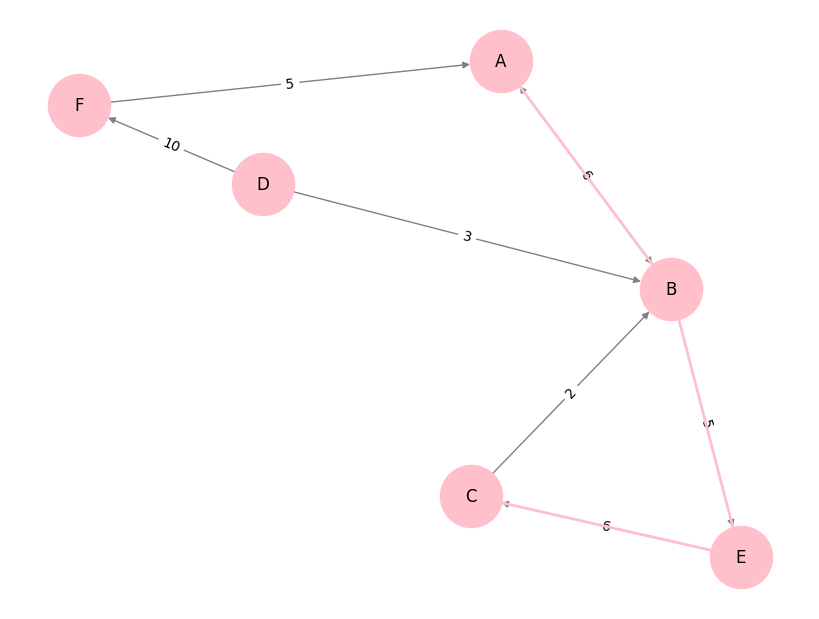


Анализ временной сложности:
   Узлы  Рёбра  Время (сек)
0     5     10     0.000053
1    10     20     0.000048
2    15     30     0.000003
3    20     40     0.000007


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import pandas as pd

def generate_graph(nodes=5, edges=7, max_weight=10):
    graph = nx.DiGraph()  
    all_nodes = [chr(65 + i) for i in range(nodes)]
    graph.add_nodes_from(all_nodes)
    
    for _ in range(edges):
        u, v = random.sample(all_nodes, 2)
        weight = random.randint(1, max_weight)
        graph.add_edge(u, v, weight=weight)
    
    return graph

def dijkstra(graph, start, end):
    try:
        path = nx.single_source_dijkstra_path(graph, start)
        if end not in path:
            return None, None
        return path[end], nx.single_source_dijkstra_path_length(graph, start)[end]
    except nx.NetworkXNoPath:
        return None, None

def yen_k_shortest_paths(graph, start, end, k=3):
    paths = []
    first_path, first_distance = dijkstra(graph, start, end)
    if not first_path:
        return paths
    
    paths.append((first_path, first_distance))
    
    for i in range(1, k):
        removed_edges = set()
        for path, _ in paths:
            for u, v in zip(path, path[1:]):
                removed_edges.add((u, v))
        
        modified_graph = graph.copy()
        modified_graph.remove_edges_from(removed_edges)
        
        start_time = time.time()
        new_path, new_distance = dijkstra(modified_graph, start, end)
        end_time = time.time()
        
        if not new_path:
            break
        
        paths.append((new_path, new_distance))
    
    return paths

def draw_graph(graph, paths=None):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='pink', edge_color='gray', node_size=2000, font_size=12)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
    
    if paths:
        for path in paths:
            path_edges = list(zip(path[0], path[0][1:]))
            nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='pink', width=2)
    plt.show()

def benchmark_algorithm():
    results = []
    for n in range(5, 21, 5):
        m = n * 2
        graph = generate_graph(n, m)
        
        start_time = time.time()
        yen_k_shortest_paths(graph, 'A', 'C', k=3) 
        end_time = time.time()
        
        execution_time = end_time - start_time
        results.append((n, m, execution_time))
    
    df = pd.DataFrame(results, columns=["Узлы", "Рёбра", "Время (сек)"])
    print("\nАнализ временной сложности:")
    print(df)
graph = generate_graph(6, 10)
k = 3 
paths = yen_k_shortest_paths(graph, 'A', 'C', k)
if paths:
    for i, (path, distance) in enumerate(paths):
        print(f"Путь {i+1}: {path} (дистанция: {distance})")
    draw_graph(graph, paths)
else:
    print("Нет путей между A и C.")
benchmark_algorithm()

### Вывод

В ходе выполнения лабораторной работы были реализованы алгоритм поиска кротчайшего расстояния между двумя вершинами как ориентированного, так и неориентированного взвешанного графа. Были выполнены алгоритмы Флойда-Уоршелла, Дейкстры, Беллмана-Форда, Джонсона, Левита и Йена. Также была выполнена визуализация через библиотеку matplotlib и проведен анализ временной сложности в зависимости от размера графа.